# Predict MVP 2021

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
with open("player_stats.pkl", "rb") as f:
    season_2021 = pickle.load(f)
#tolgo seasons che non ci servono
season_2021 = season_2021[season_2021["SEASON_ID"] == 2021]

#season_2021 = season_2021[season_2021["SEASON_ID"] == 2021]

#sposto la colonna MVP per prima per comodita
cols = season_2021.columns.tolist()
cols = cols[-2:] + cols[:-2]
season_2021 = season_2021[cols]

season_2021["GP"]=season_2021["GP"].astype('int')
season_2021["FGM"]=season_2021["FGM"].astype('int')
season_2021["FGA"]=season_2021["FGA"].astype('int')
season_2021["FG3M"]=season_2021["FG3M"].astype('int')
season_2021["FG3A"]=season_2021["FG3A"].astype('int')
season_2021["FTM"]=season_2021["FTM"].astype('int')
season_2021["FTA"]=season_2021["FTA"].astype('int')
season_2021["OREB"]=season_2021["OREB"].astype('int')
season_2021["DREB"]=season_2021["DREB"].astype('int')
season_2021["REB"]=season_2021["REB"].astype('int')
season_2021["AST"]=season_2021["AST"].astype('int')
season_2021["STL"]=season_2021["STL"].astype('int')
season_2021["BLK"]=season_2021["BLK"].astype('int')
season_2021["TOV"]=season_2021["TOV"].astype('int')
season_2021["PF"]=season_2021["PF"].astype('int')
season_2021["PTS"]=season_2021["PTS"].astype('int')


season_2021

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
17,0.0,7,1630173,2022,1610612761,22.0,27,659.0,89,221,...,0.569,62,141,203,40,15,15,30,59,216
44,0.0,4,203500,2022,1610612763,28.0,40,1026.0,105,198,...,0.600,172,203,375,119,33,23,64,66,279
49,0.0,4,1628389,2022,1610612748,24.0,18,592.0,126,243,...,0.759,49,134,183,57,20,6,53,59,337
89,0.0,4,1630583,2022,1610612763,20.0,20,217.0,29,79,...,0.588,21,37,58,13,2,5,7,22,72
116,0.0,2,200746,2022,1610612751,36.0,29,663.0,165,292,...,0.846,43,120,163,23,11,32,25,48,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,0.0,10,201152,2022,1610612759,33.0,23,323.0,65,114,...,0.444,34,45,79,55,20,6,23,33,138
5940,0.0,12,1629027,2022,1610612737,23.0,34,1179.0,329,719,...,0.897,26,112,138,328,31,3,141,58,962
5941,0.0,4,1630209,2022,1610612748,23.0,30,425.0,71,148,...,0.622,53,128,181,22,13,16,26,49,166
5950,0.0,12,203469,2022,1610612757,29.0,25,330.0,46,81,...,0.766,45,69,114,20,8,6,18,53,128


In [3]:
#standardizzazione i nostri dati per anno

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols = season_2021.columns
num_cols = num_cols.drop(["MVP",'CONF_RANK', 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID'])

season_2021_norm=pd.DataFrame()
season_2021_norm = pd.concat([season_2021_norm, season_2021],axis=0,ignore_index=True)


In [4]:

for col in num_cols.tolist():
    season_2021_norm[[col]] = scaler.fit_transform(season_2021[[col]].to_numpy().reshape(-1,1))

    #train_data.loc[train_data['SEASON_ID']==year, col]=scaler.fit_transform(train_features.loc[train_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))

season_2021_norm

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0.0,7,1630173,2022,1610612761,-0.904506,0.504013,0.490957,0.158097,0.300367,...,-0.215129,1.743538,1.089080,1.311262,-0.095090,0.018680,0.459291,0.154600,0.707808,0.041369
1,0.0,4,203500,2022,1610612763,0.535901,1.511402,1.397930,0.356423,0.169372,...,-0.115050,6.279345,1.988694,3.233328,1.226608,1.226340,1.101664,1.322473,0.930798,0.325693
2,0.0,4,1628389,2022,1610612748,-0.424370,-0.193409,0.325379,0.616725,0.425667,...,0.398257,1.207488,0.987510,1.087766,0.189326,0.354141,-0.263378,0.944632,0.707808,0.587452
3,0.0,4,1630583,2022,1610612763,-1.384641,-0.038427,-0.601364,-0.585624,-0.508387,...,-0.153791,0.052919,-0.419951,-0.309084,-0.546810,-0.853519,-0.343675,-0.635432,-0.470857,-0.608516
4,0.0,2,200746,2022,1610612751,2.456443,0.658996,0.500842,1.100144,0.704745,...,0.679123,0.960080,0.784372,0.864270,-0.379506,-0.249689,1.824333,-0.017146,0.357394,0.808594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.0,10,201152,2022,1610612759,1.736240,0.194048,-0.339405,-0.139392,-0.309047,...,-0.618673,0.588969,-0.303871,-0.074413,0.155865,0.354141,-0.263378,-0.085845,-0.120443,-0.310652
603,0.0,12,1629027,2022,1610612737,-0.664438,1.046454,1.776041,3.132982,3.136704,...,0.843769,0.259092,0.668292,0.584900,4.723251,1.092155,-0.504268,3.967364,0.675952,3.408133
604,0.0,4,1630209,2022,1610612748,-0.664438,0.736488,-0.087331,-0.065019,-0.115401,...,-0.044027,1.372426,0.900451,1.065417,-0.396236,-0.115505,0.539588,0.017203,0.389250,-0.184286
605,0.0,12,203469,2022,1610612757,0.775969,0.349031,-0.322106,-0.374903,-0.496997,...,0.420855,1.042550,0.044366,0.316705,-0.429697,-0.450966,-0.263378,-0.257591,0.516673,-0.355783


## Predict 2021

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
test_2021_labels = season_2021_norm[["MVP"]]

name_model = "log_reg"

# with open("svm_40.pkl", "rb") as f:
with open(name_model+".pkl", "rb") as f:
# with open("svm.pkl", "rb") as f:
# with open("rf.pkl", "rb") as f:
# with open("log_reg.pkl", "rb") as f:

    log_reg = pickle.load(f)


    ###                             ###

# train_2021 = season_2021_norm[["CONF_RANK", "GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF"]]
train_2021 = season_2021_norm[["CONF_RANK", "GP", "MIN", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "PF"]]
# train_2021 = season_2021_norm.drop(["MVP", 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID', "PLAYER_AGE"], axis=1)


predicted_labels = log_reg.predict(train_2021)
print(f"The balanced accuracy score is  {balanced_accuracy_score(test_2021_labels,predicted_labels)}")

The balanced accuracy score is  0.9950576606260296


/home/thomas/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [6]:
#Unisco i dataset
predict_2021 = pd.DataFrame(predicted_labels, columns=["MVP_Predict"])
predict_2021["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

winners_id = predict_2021.loc[predict_2021["MVP_Predict"] == 1, "PLAYER_ID"]

In [7]:
from nba_api.stats.static import players

for id in list(winners_id):
    print(players.find_player_by_id(id))

{'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
{'id': 201935, 'full_name': 'James Harden', 'first_name': 'James', 'last_name': 'Harden', 'is_active': True}
{'id': 101108, 'full_name': 'Chris Paul', 'first_name': 'Chris', 'last_name': 'Paul', 'is_active': True}


### PROBABILITIES 2021

In [8]:

# test_2021_labels = season_2021_norm[["MVP"]]
#
# with open("log_reg.pkl", "rb") as f:
#     log_reg = pickle.load(f)

#train_2021 = season_2021_norm[["GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", 'CONF_RANK']]
predicted_labels = pd.DataFrame(log_reg.predict_proba(train_2021))

predicted_labels.rename(columns={0:'NOT',1:'MVP'},inplace=True)

predicted_labels = pd.DataFrame(predicted_labels, columns=["MVP"])
predicted_labels["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

#Sort
mvp_candidates = predicted_labels.sort_values(by='MVP',ascending=False)

#Take only better
mvp_candidates = mvp_candidates.head(10)

mvp_candidates_names = pd.DataFrame()
# for row, id in mvp_candidates["PLAYER_ID"].iterrows():
#     name_player = players.find_player_by_id(id["PLAYER_ID"])
#     if name_player is not None:
#         name = pd.DataFrame.from_dict(name_player, orient="index")
#
#         name = name.transpose()
#         name["mvp_prob"] = list(id["MVP"])
#         mvp_candidates_names = pd.concat([mvp_candidates_names,name], axis=0, ignore_index=True)

for id in list(mvp_candidates["PLAYER_ID"]):
    name_player = players.find_player_by_id(id)
    name = pd.DataFrame.from_dict(name_player, orient="index")

    name = name.transpose()
    mvp_candidates_names = pd.concat([mvp_candidates_names,name], axis=0, ignore_index=True)

mvp_candidates_names["mvp_prob"] = list(mvp_candidates["MVP"])
mvp_candidates_names

,id,full_name,first_name,last_name,is_active,mvp_prob
0,201935,James Harden,James,Harden,True,0.985963
1,101108,Chris Paul,Chris,Paul,True,0.924167
2,201142,Kevin Durant,Kevin,Durant,True,0.716800
3,203897,Zach LaVine,Zach,LaVine,True,0.139101
4,203507,Giannis Antetokounmpo,Giannis,Antetokounmpo,True,0.119785
5,201942,DeMar DeRozan,DeMar,DeRozan,True,0.117864
6,201939,Stephen Curry,Stephen,Curry,True,0.101497
7,203497,Rudy Gobert,Rudy,Gobert,True,0.021332
8,1626164,Devin Booker,Devin,Booker,True,0.003922
9,203110,Draymond Green,Draymond,Green,True,0.001859


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'James Harden'),
  Text(1, 0, 'Chris Paul'),
  Text(2, 0, 'Kevin Durant'),
  Text(3, 0, 'Zach LaVine'),
  Text(4, 0, 'Giannis Antetokounmpo'),
  Text(5, 0, 'DeMar DeRozan'),
  Text(6, 0, 'Stephen Curry'),
  Text(7, 0, 'Rudy Gobert'),
  Text(8, 0, 'Devin Booker'),
  Text(9, 0, 'Draymond Green')])

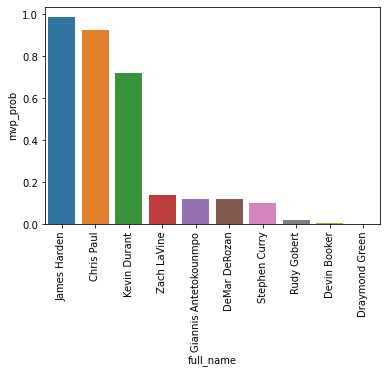

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#mvp_candidates_names.plot.bar(x='full_name',y='mvp_prob' )
sns.barplot(x='full_name',y='mvp_prob',data=mvp_candidates_names.head(10))
plt.xticks(rotation=90)
#plt.savefig('plot/'+name_model+'_test30.png', bbox_inches='tight')

In [82]:
real_winners_2021 = ["NIKOLA JOKIC", "JOEL EMBIID", "STEPHEN CURRY", "GIANNIS ANTETOKOUNMPO", "CHRIS PAUL", "LUKA DONCIC", "DAMIAN LILLARD", "JULIUS RANDLE", "DERRICK ROSE", "RUDY GOBERT"]

real_winners_2021 = [str.title() for str in real_winners_2021] #Title for capitalize name and surname

versus = pd.DataFrame()
versus["Predicted_rank"] = list(mvp_candidates_names["full_name"].head(10))
versus["Real_rank"] = real_winners_2021
weight = list(reversed(range(1,11)))
i = 0
score = 0

# for row, names in versus.iterrows():
#     if names["Predicted_rank"] == names["Real_rank"]:
#         score = score + weight[i]
#     else:
#         j = i + 1
#         real_name = names["Real_rank"]
#         while names["Predicted_rank"] != real_name or j < 9:
#             real_name = versus.at[j,"Real_rank"]
#             j = j + 1
#
#         if j > 10:
#             score = score + weight[j]
#
#     i = i+1

for row, names in versus.iterrows():
    if names["Predicted_rank"] == names["Real_rank"]:
        score = score + weight[0]

score = score / sum(weight)
score



0.0